Hola Rafael!

Mi nombre es Matias y voy a estar revisando tu proyecto.

En la primer revision, de encontrar errores voy a estar marcandotelos para que puedas corregirlos por tu cuenta. Lo mas parecido a una situacion real de trabajo como DA. De haber posteriores revisiones

Encontraras mis comentarios debajo - **por favor no los muevas, modifiques o elimines**.

Encontraras mis comentarios en verde, amarillo o rojo de esta manera:

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Cuidado, se recomienda...
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Necesita correcion. El trabajo no puede ser aceptado si precisa correcion.
</div>

Puedes responder a mis comentarios utilizando un mensaje de este tipo:

<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
</div>

# Recopilación y almacenamiento de datos (SQL) proyecto final

## Introducción

**Paso 4. Análisis exploratorio de datos **

Tenemos los siguientes archivos/datasets para trabajar las diferentes secciones mencionadas:

***/datasets/project_sql_result_01.csv***. contiene los siguientes datos:  
* company_name: nombre de la empresa de taxis

* trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017.

***/datasets/project_sql_result_04.csv***. contiene los siguientes datos:  

* dropoff_location_name: barrios de Chicago donde finalizaron los viajes

* average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.  

Realizaremos los siguientes pasos:  
* importar los archivos
* estudiar los datos que contienen
* asegurar de que los tipos de datos sean correctos
* identificar los 10 principales barrios en términos de finalización del recorrido
* hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones
* sacar conclusiones basadas en cada gráfico y explicar los resultados

**Paso 5. Prueba de hipótesis (Python)**

***/datasets/project_sql_result_07.csv*** — el resultado de la última consulta. Contiene datos sobre viajes desde el Loop hasta el Aeropuerto Internacional O'Hare. Recuerda, estos son los valores de campo de la tabla:
* start_ts: fecha y hora de la recogida
* weather_conditions: condiciones climáticas en el momento en el que comenzó el viaje
* duration_seconds: duración del viaje en segundos

**Prueba la hipótesis:**

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Decidir dónde establecer el nivel de significación (alfa).

Conclusiones

## Analisis exploratorio 

##  Procesamiento de datos

### Librerias a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as nd
import math as mt
from scipy import stats

###  Cargamos los datos

In [2]:
df1 = pd.read_csv('/datasets/project_sql_result_01.csv')
df4 = pd.read_csv('/datasets/project_sql_result_04.csv')
df7 = pd.read_csv('/datasets/project_sql_result_07.csv')

### Verificamos la informacion general de ambos dataframes

In [3]:
def display_df(data):
    data.info()
    display(data.head())
    print(data.isna().sum())

In [4]:
display_df(df1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


company_name    0
trips_amount    0
dtype: int64


Observamos que los tipos de datos estan correctos y no contamos con valores ausentes, contamos con 64 compañias diferentes con sus respectivos viajes durante la fecha del 15 y 16 de noviembre de 2017.

In [5]:
display_df(df4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


dropoff_location_name    0
average_trips            0
dtype: int64


Observamos que los tipos de datos estan correctos y no contamos con valores ausentes, tenemos 94 localizaciones de destino con su promedio de viajes a estos estos destinos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen comienzo.
</div>

### Valores unicos

In [6]:
df1_uni = df1['company_name'].unique()
df1_uni.sort()
print(df1_uni)

['0118 - 42111 Godfrey S. Awir' '1085 - 72312 N and W Cab Co'
 '1469 - 64126 Omar Jada' '2092 - 61288 Sbeih Company'
 '2192 - 73487 Zeymane Corp' '2241 - 44667 - Felman Corp' '24 Seven Taxi'
 '2733 - 74600 Benny Jona' '2809 - 95474 C & D Cab Co Inc.'
 '2823 - 73307 Lee Express Inc' '3011 - 66308 JBL Cab Inc.' '303 Taxi'
 '3556 - 36214 RC Andrews Cab' '3591 - 63480 Chuks Cab'
 '3620 - 52292 David K. Cab Corp.' '3623 - 72222 Arrington Enterprises'
 '3721 - Santamaria Express' '4053 - 40193 Adwar H. Nikola'
 '4615 - 83503 Tyrone Henderson' '4623 - 27290 Jay Kim' '5 Star Taxi'
 '5006 - 39261 Salifu Bawa' '5062 - 34841 Sam Mestas'
 '5074 - 54002 Ahzmi Inc' '5874 - 73628 Sergey Cab Corp.'
 '5997 - 65283 AW Services Inc.' '6057 - 24657 Richard Addo'
 '6574 - Babylon Express Inc.' '6742 - 83735 Tasha Ride Inc'
 '6743 - 78771 Luhak Corp' 'American United'
 'American United Taxi Affiliation' 'Blue Diamond'
 'Blue Ribbon Taxi Association Inc.' 'Checker Taxi'
 'Checker Taxi Affiliation' 'Chicago C

No vemos ninguna anomalia en los valores unicos del nombre de las compañias

In [7]:
df4_uni = df4['dropoff_location_name'].unique()
df4_uni.sort()
print(df4_uni)

['Albany Park' 'Andersonville' 'Archer Heights' 'Armour Square' 'Ashburn'
 'Auburn Gresham' 'Austin' 'Avalon Park' 'Avondale' 'Belmont Cragin'
 'Beverly' 'Boystown' 'Bridgeport' 'Brighton Park' 'Bucktown' 'Burnside'
 'Calumet Heights' 'Chatham' 'Chicago Lawn' 'Chinatown' 'Clearing'
 'Douglas' 'Dunning' 'East Side' 'East Village' 'Edgewater' 'Edison Park'
 'Englewood' 'Fuller Park' 'Gage Park' 'Garfield Park' 'Garfield Ridge'
 'Gold Coast' 'Grand Boulevard' 'Grand Crossing' 'Grant Park' 'Hegewisch'
 'Hermosa' 'Humboldt Park' 'Hyde Park' 'Irving Park' 'Jackson Park'
 'Jefferson Park' 'Kenwood' 'Lake View' 'Lincoln Park' 'Lincoln Square'
 'Little Italy, UIC' 'Little Village' 'Logan Square' 'Loop'
 'Lower West Side' 'Mckinley Park' 'Montclare' 'Morgan Park'
 'Mount Greenwood' 'Museum Campus' 'Near South Side' 'New City'
 'North Center' 'North Lawndale' 'North Park' 'Norwood Park' "O'Hare"
 'Oakland' 'Old Town' 'Portage Park' 'Pullman' 'River North' 'Riverdale'
 'Rogers Park' 'Roseland' 'Ru

No vemos anomalias en los nombres unicos de los lugares de destino

### Top 10 de compañias con mas viajes

In [8]:
top_df1 = df1.sort_values(by='trips_amount',ascending=False).head(10)
top_df1

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


### Top 10 de destinos con mas promedio de viajes

In [9]:
top_df4 = df4.sort_values(by='average_trips',ascending=False).head(10)
top_df4

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


Ya tenemos nuestros datos a utilizar del top 10 de de compañias con mas viajes y de destinos finales con mas viajes de destino, pasaremos a la parte visual.

## Visualizacion de datos

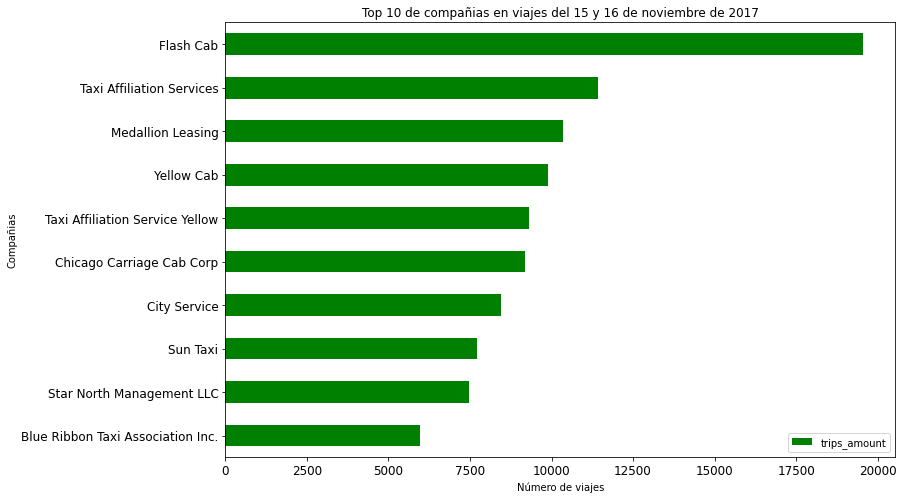

In [10]:
top_df1 = top_df1.sort_values(by='trips_amount')
top_df1.plot(kind='barh',
             x = 'company_name',
             rot=0,
             fontsize=12,
             figsize=(12,8),
             color='green')
plt.title('Top 10 de compañias en viajes del 15 y 16 de noviembre de 2017')
plt.xlabel('Número de viajes')
plt.ylabel('Compañias')
plt.show()

De 64 compañias de taxi que tenemos nuestro top 10 las cuales tienen la mayor cantidad de viajes, de igual forma podemos ver que la compañia Flash Cab tiene la mayor cantidad de viajes, duplicando en viajes a la mayoria de las demas compañias con 20,000 viajes aproximadamente, seguido de Taxi Affiliation Services con 11,000 viajes aproximadamente, claramente observamos que Flash Cab tiene mayor nombre en el mercado y esto en tan solo dos dias.

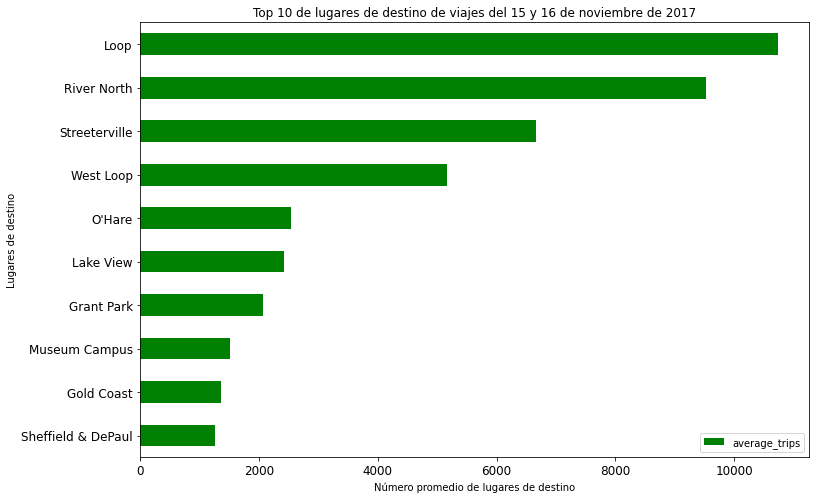

In [11]:
top_df4 = top_df4.sort_values(by='average_trips')
top_df4.plot(kind='barh',
             x = 'dropoff_location_name',
             fontsize=12,
             figsize=(12,8),
             rot=0,
             color='green')
plt.title('Top 10 de lugares de destino de viajes del 15 y 16 de noviembre de 2017')
plt.xlabel('Número promedio de lugares de destino')
plt.ylabel('Lugares de destino')
plt.show()

De 94 localizaciones de destino obtenidas de viajes en dos dias, tenemos 4 localizaciones de gran impacto en los viajes, Loop, River North, Streeterville y West Loop, ya que estas 4 localizaciones tienen viajes de destino de mas de 5000 a 10000 viajes, mientras que los demas lugares estan muy por debajo de la media de estos 4 destinos, tendriamos que preguntarnos seran lugares muy populares/turisticos? o seran lugares con alta concentracion de trabajos o viviendas?. 

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, bien hecho con los top 10.
</div>

## Prueba de hipotesis

In [12]:
display_df(df7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


Observamos que no tenemos datos ausentes, recordemos que la columna **weather_conditions** consta de dos valores, *good y bad* a los cuales el valor bad se le atribuye clima lluvioso y tormentoso.  

Tenemos datos tipo object en la columna star_ts, los cuales cambiaremos a tipo datetime para poder hacer analisis correspondiente.

###  Correcion de datos

In [13]:
#Convertimos a formato datetime
df7['start_ts'] = pd.to_datetime(df7['start_ts'], format='%Y-%m-%d %H:%M:%S')

In [14]:
display_df(df7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64


Vamos a verificar las fechas para revisar las fechas y asi tener los datos consisos de los dias que vamos a revisar, en este caso que sea sabado y posteriormente si la condicion del clima es buena o mala

In [15]:
df7['day'] = df7['start_ts'].dt.day_name()
df7.head()

,start_ts,weather_conditions,duration_seconds,day
0,2017-11-25 16:00:00,Good,2410.0,Saturday
1,2017-11-25 14:00:00,Good,1920.0,Saturday
2,2017-11-25 12:00:00,Good,1543.0,Saturday
3,2017-11-04 10:00:00,Good,2512.0,Saturday
4,2017-11-11 07:00:00,Good,1440.0,Saturday


In [16]:
print(df7['weather_conditions'].unique())
print(df7['day'].unique())

['Good' 'Bad']
['Saturday']


Con esto confirmamos que nuestra tabla solo contiene valores de dias sabados, vamos a separar los datos en dos:
* Condiciones buenas (good)
* Condiciones malas (bad)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Genial, buen trabajo con el timestamp.
</div>

### Hipótesis sobre la igualdad de las medias de dos poblaciones

Prueba la hipótesis:

"La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos".

Revisaremos si las muestras estan normalmente distribuidas

#### Revision de distribuciones

In [17]:
# H0 La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare son iguales los sábados lluviosos o clima malo
# H1 La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no son iguales los sábados con clima bueno 

# Establecemos nuestro valor de tolerancia 0.05 ya que al ser la misma distancia no deberia haber mucha tolerancia
alpha = 0.05

def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Rechazamos la hipótesis nula >> La informacion no esta normalmente distribuida")
    else:
        print("No rechazamos la hipótesis nula >> la informacion esta normalmente distribuida")        

In [18]:
check_normality(df7.query('weather_conditions == "Good"')['duration_seconds'])
check_normality(df7.query('weather_conditions == "Bad"')['duration_seconds'])

p value:0.0000
Rechazamos la hipótesis nula >> La informacion no esta normalmente distribuida
p value:0.0036
Rechazamos la hipótesis nula >> La informacion no esta normalmente distribuida


#### Revision de varianzas

In [19]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Rechazamos la hipótesis nula >> Las varianzas de las muestras son diferentes.")
    else:
        print("No rechazamos la hipótesis nula >> Las varianzas de las muestras son iguales.")

In [20]:
check_variance_homogeneity(df7.query('weather_conditions == "Good"')['duration_seconds'], df7.query('weather_conditions == "Bad"')['duration_seconds'])

p value:0.5332
No rechazamos la hipótesis nula >> Las varianzas de las muestras son iguales.


In [21]:
ttest,pvalue = stats.mannwhitneyu(df7.query('weather_conditions == "Good"')['duration_seconds'],
                                  df7.query('weather_conditions == "Good"')['duration_seconds'], alternative="two-sided")
print("p-value:%.4f" % pvalue)
if pvalue <0.05:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:1.0000
No rechazamos la hipótesis nula


LLegando a esta conclusión, no rechazamos la hipotesis nula, es decir, la duracion de los viajes no representa mayor variacion respecto al estado del clima, por lo que los tiempos de traslado en sábado es similar independientemente del tiempo

### Conclusión

De nuestra muestra general de viajes de sabado de la locación Loop al aeropuerto O'hare, obtuvimos nuestras dos muestras dependiendo el estado del clima.  
Con esto pasamos a revisar si cada muestra esta normalmente distribuida usando el test de **"Shapiro-Wilk’s W"** y de igual forma revisar la similitud de las varianzas de las muestras.  
Obtenemos de resultado que las muestras no estan normalmente distribuidas y que las varianzas entre las dos muestras son iguales.  
Una vez obtenidas estas 3 suposiciones pasamos a utilizar el metodo **Mann Whitney U** el cual funciona con muestras que no estan normalmente distribuidas y con varianzas iguales, llegando a la conclusion que:

*No rechazamos la hipotesis nula, es decir, la duracion de los viajes no representa mayor variacion respecto al estado del clima, por lo que los tiempos de traslado en sábado es similar independientemente del tiempo.*


<div class="alert alert-block alert-success">
<b>Comentarios de Revisor</b> <a class="tocSkip"></a>

Bien hecho, se nota manejas el concepto del test de hipotesis
    
H0 y H1 fueron planteadas correctamente e interpretaste el resultado correctamente
</div>

<div class="alert alert-block alert-danger">
<b>Comentarios de Revisor</b> <a class="tocSkip"></a>

<b>Necesita correccion</b>

Solo modificaria 2 cuestiones de esta seccion (ya que el resto del proyecto esta muy bien)

Primero, antes de ejecutar un <b>ttest</b> ya que este asume las muestras tienen distribucion normal e igual varianza, deberiamos corroborar esto mismo. 

Hay un test llamado Shapiro que sirve para testear normalidad de las muestras, acompanarlo de un distplot siempre es buena practica
    
Y otro llamada Levene que sirve para testear igualdad de varianzas entre muestras
    
Una vez ejecutados estos tests si hay normalidad en las muestras, podemos ejecutar ttest (con el parametro eqal_var en true o false segun haya dado el test Levene).
    
Si no hay normalidad se recomienda en vez de ttest usar el test Mann-Whitney.

Te dejo este <a href="https://towardsdatascience.com/hypothesis-testing-with-python-step-by-step-hands-on-tutorial-with-practical-examples-e805975ea96e"> enlace </a> para que uses de guia en la correccion  
</div>

<div class="alert alert-block alert-light">
<b>Comentarios de Revisor</b> <a class="tocSkip"></a>

Vas por muy buen camino, espero la devolucion de tu proyecto con la mejora del test de hipotesis para poder aprobarlo.
</div>


<div class="alert alert-block alert-info">
<b>Respuesta de estudiante.</b> <a class="tocSkip"></a>
    
Corregido, PD: excelente contenido de las hipotesis, desconocia esta serie de pruebas para determinar las distribuciones y varianza y por consiguiente su prueba especifica.
</div>

<div class="alert alert-block alert-success">
<b>Comentarios de Revisor - 2da ITERACION</b> <a class="tocSkip"></a>

Bien hecho Rafael, te felicito. Tu proyecto esta aprobado
    
Que bueno que te haya servido el recurso compartido para ahondar en el tema
</div>